In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('/content/JPM-Multiverse.csv', parse_dates=['Date'], index_col='Date')
data = data[['Close']]
data.index = pd.to_datetime(data.index)
data = data.asfreq('B')

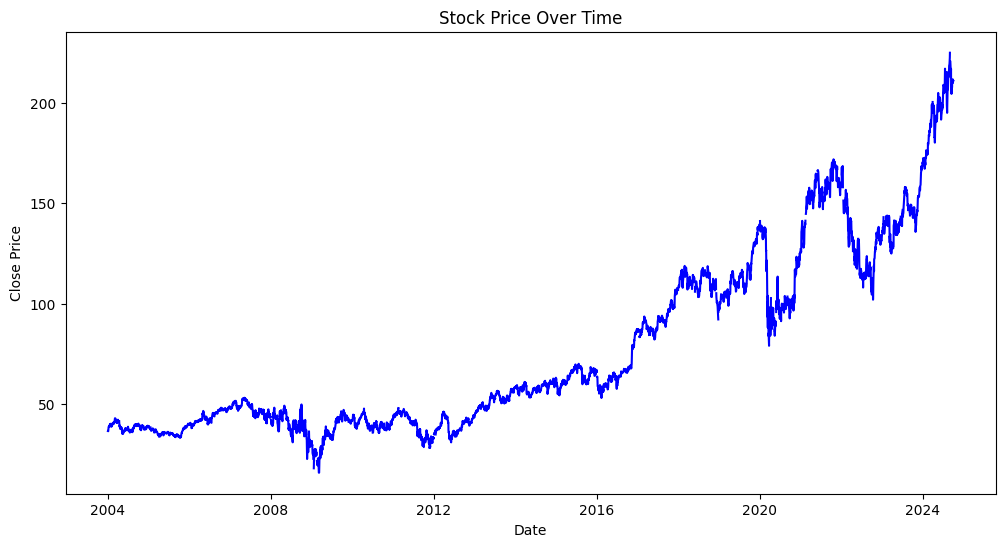

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5412 entries, 2004-01-02 to 2024-09-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5221 non-null   float64
dtypes: float64(1)
memory usage: 84.6 KB
None
             Close
count  5221.000000
mean     76.963951
std      45.148905
min      15.900000
25%      41.130000
50%      57.030000
75%     109.950000
max     224.800000


In [43]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='blue')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

print(data.info())
print(data.describe())

ADF Statistic: 1.0765170456180055
p-value: 0.9950111370539453


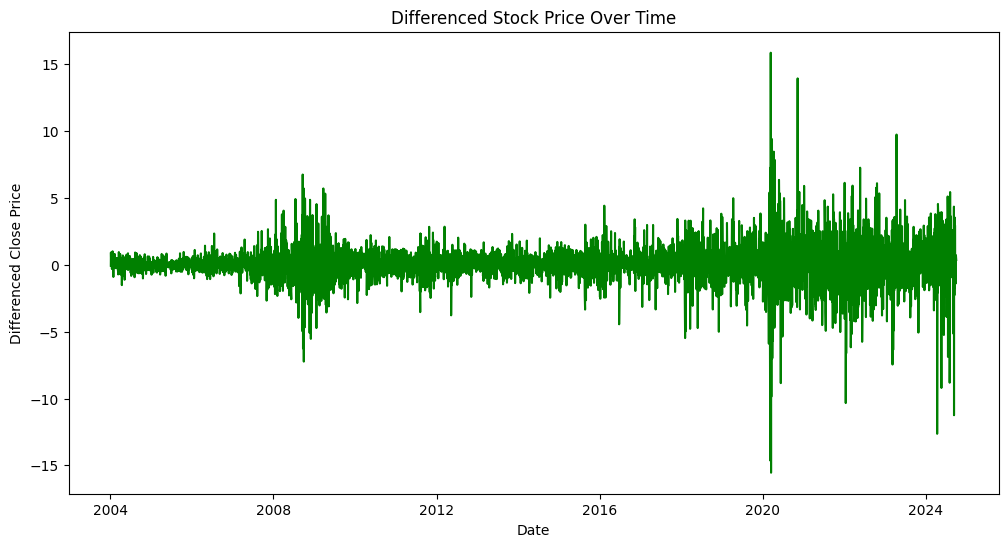

In [44]:
from statsmodels.tsa.stattools import adfuller
data['Close']= data['Close'].ffill()
result = adfuller(data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
data['Differenced_close'] = data['Close'].diff().dropna()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Differenced_close'], color='green')
plt.title('Differenced Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.show()


In [45]:
from statsmodels.tsa.arima.model import ARIMA
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:].copy()

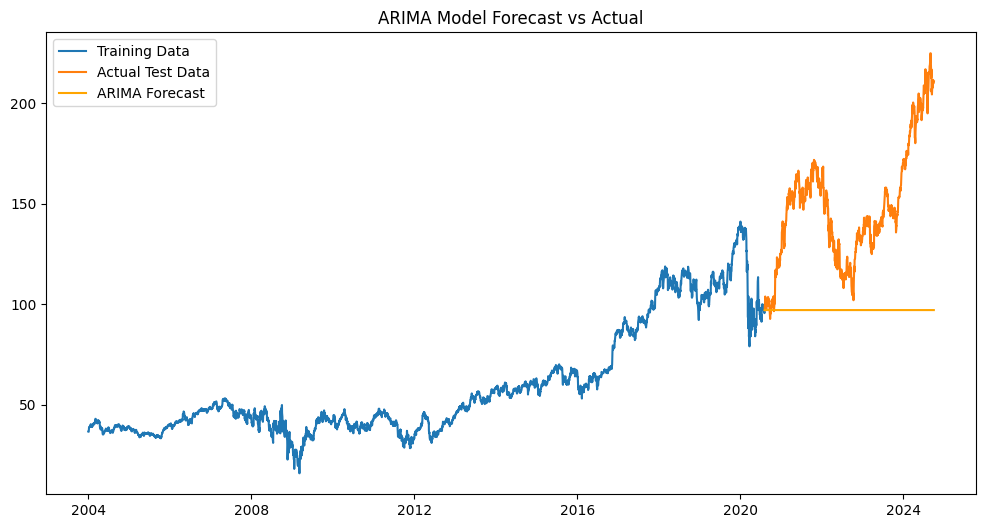

In [46]:
#train = data[:train_size].copy()
#test = data[train_size:].copy()

#from statsmodels.tsa.arima.model import ARIMA
#train_size = int(len(data) * 0.8)

#train, test = data[:train_size], data[train_size:].copy()

arima_model = ARIMA(train['Close'], order=(5, 1, 0))
arima_fitted = arima_model.fit()
arima_forecast = arima_fitted.forecast(steps=len(test))
test['ARIMA_Forecast'] = arima_forecast.values

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Training Data')
plt.plot(test.index, test['Close'], label='Actual Test Data')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Model Forecast vs Actual')
#plt.xlabel('Date')
#plt.ylabel('Close Price')
plt.legend()
plt.show()